In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

import sys
sys.path.append("../")
import importlib
import mqe
importlib.reload(mqe)
importlib.reload(mqe.plot)

<module 'mqe.plot' from '../mqe/plot.py'>

In [90]:
trial_name = 'trial_final_test'
model_name = 'lightgbm'

## Load result

In [91]:
path = '../result/gefcom2014-wind/'+trial_name+'/dfs_loss_valid/*'+model_name+'*.csv'
dfs_loss_valid = mqe.forecast.load_dfs_trial(path)

## Competition benchmark

In [31]:
loss_mean_valid = [df.mean().mean() for df in dfs_loss_valid]

In [95]:
df_scores = pd.read_excel('../data/gefcom2014/gefcom2014-scores.xlsx', index_col=0, header=0, sheet_name='Wind', engine='openpyxl')
df_scores.loc[trial_name,:] = loss_mean_valid
df_scores.loc[:,'Overall'] = df_scores.mean(axis=1)

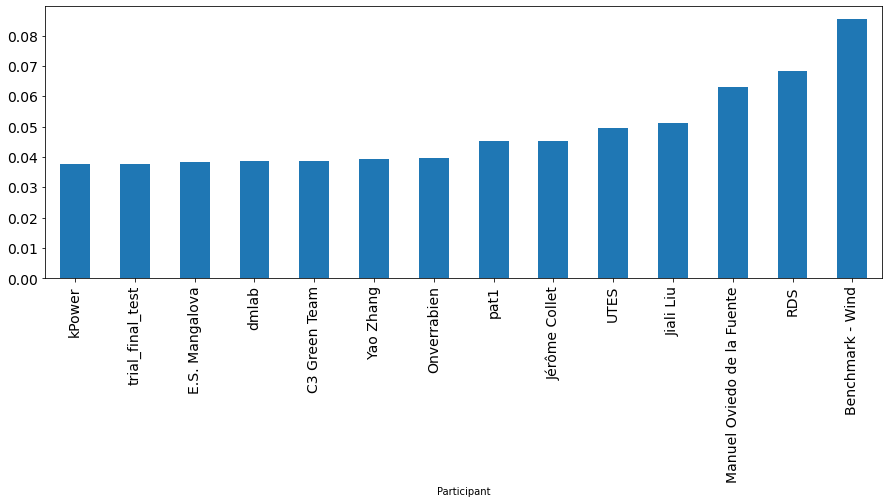

In [96]:
ax = df_scores['Overall'].sort_values().plot.bar(figsize=(15,5))

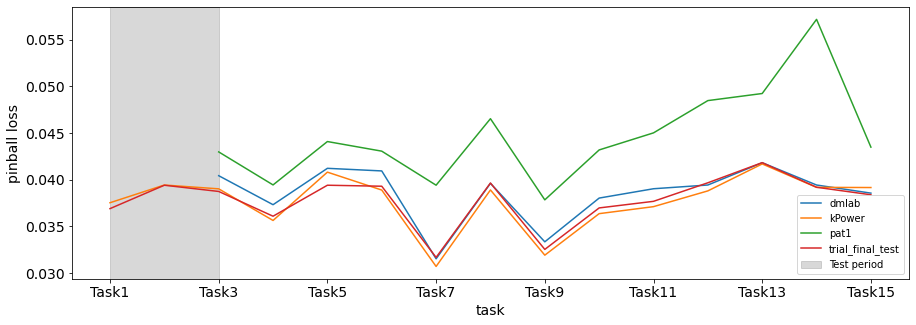

In [99]:
wind_teams = ['dmlab', 'kPower', 'pat1']
solar_teams = ['Gang-gang', 'dmlab', 'C3 Green Team']
fig, ax = plt.subplots(figsize=(15,5))

for team in wind_teams: 
    df_scores.loc[team,:][:-1].plot(ax=ax)
ylim = ax.get_ylim()
df_area = pd.DataFrame(data=np.repeat(ylim[1], 3), index=df_scores.columns[:3], columns=['Test period'])
df_area.plot.area(ax=ax, color='grey', alpha=0.3)
df_scores.loc[trial_name,:][:-1].plot(ax=ax)
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('task', fontsize=14)
ax.set_ylabel('pinball loss', fontsize=14)
ax.legend()

## Pinball loss as function of quantiles

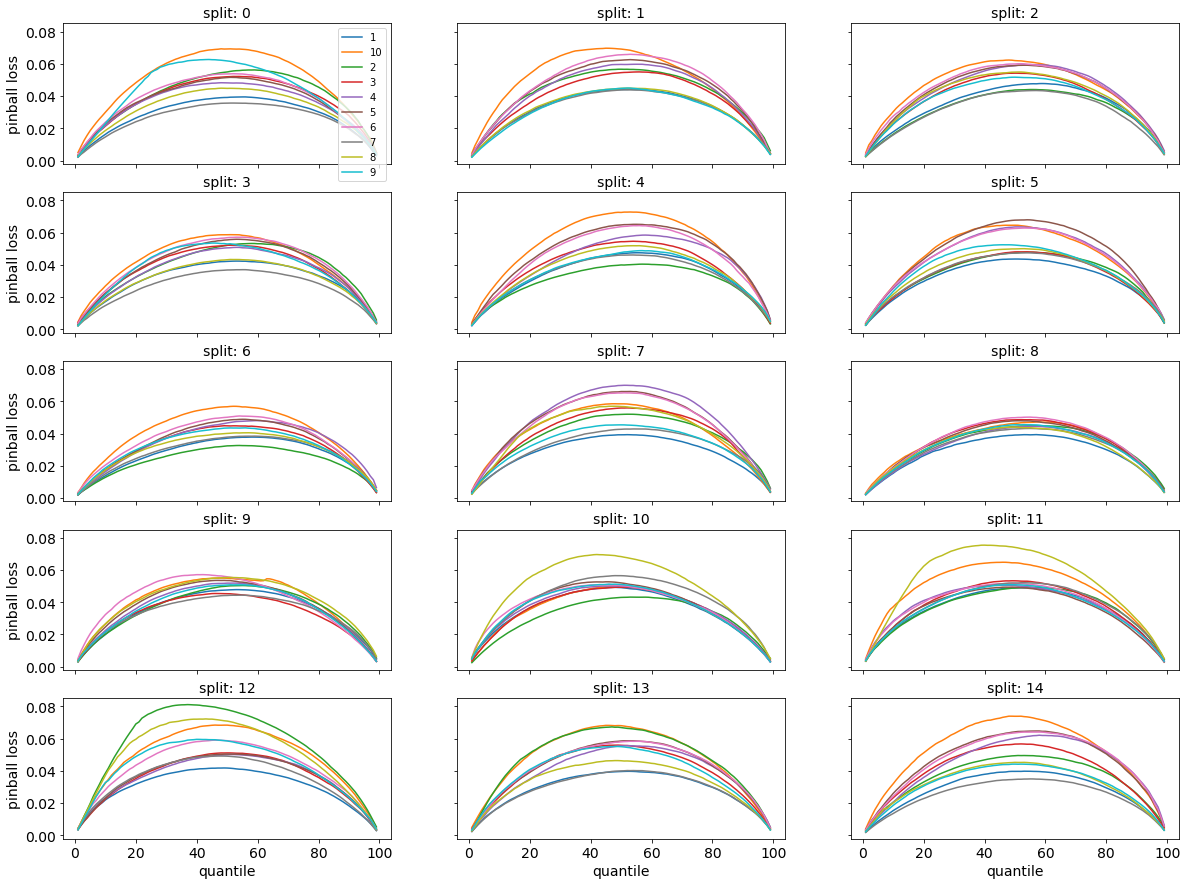

In [92]:
mqe.plot.plot_quantile_loss(dfs_loss_valid)